# Proyek Analisis Data : E - Commerce Public Dataset
- **Nama:** Noel Chrisdian
- **Email:** noelchrisdian@gmail.com
- **ID Dicoding:** noel_chrisdian

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah pesanan berdasarkan status pesanan?
- Bagaimana perbedaan waktu pengiriman antara tanggal estimasi dengan tanggal pengiriman aktual?
- Bagaimana distribusi jumlah pesanan berdasarkan kota pelanggan?
- Bagaimana distribusi score review?
- Apa kategori barang yang paling banyak dipesan?
- Bagaimana distribusi jumlah pesanan berdasarkan metode pembayaran?

## Import Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load Product Dataset

In [2]:
products = pd.read_csv('./Data/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
translation = pd.read_csv('./Data/product_category_name_translation.csv')
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Load Seller Dataset

In [4]:
sellers = pd.read_csv('./Data/sellers_dataset.csv', encoding='latin1')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Load Customers Dataset

In [5]:
customers = pd.read_csv('./Data/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Load Order Dataset

In [6]:
orders = pd.read_csv('./Data/orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2017 10:56,02/10/2017 11:07,04/10/2017 19:55,10/10/2017 21:25,18/10/2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2018 20:41,26/07/2018 03:24,26/07/2018 14:31,07/08/2018 15:27,13/08/2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2018 08:38,08/08/2018 08:55,08/08/2018 13:50,17/08/2018 18:06,04/09/2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 00:28,15/12/2017 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13/02/2018 21:18,13/02/2018 22:20,14/02/2018 19:46,16/02/2018 18:17,26/02/2018 00:00


In [7]:
reviews = pd.read_csv('./Data/order_reviews_dataset.csv', encoding='latin1')
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00:00,11/03/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00:00,18/02/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/04/2017 00:00,21/04/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01/03/2018 00:00,02/03/2018 10:26


In [8]:
payments = pd.read_csv('./Data/order_payments_dataset.csv')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
orderItems = pd.read_csv('./Data/order_items_dataset.csv')
orderItems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14


### Assessing Data

#### Products Dataset

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [12]:
products.duplicated().sum()

np.int64(0)

**Insights**
- Terdapat banyak missing values pada beberapa kolom
- Tidak ditemukan data yang duplikat

#### Sellers Dataset

In [13]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [14]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [15]:
sellers.duplicated().sum()

np.int64(0)

In [16]:
sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insights**
- Tidak ditemukan missing dan duplicated value
- Di dalam output method describe(), terdapat NaN karena tipe datanya object

#### Customers Dataset

In [17]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [19]:
customers.duplicated().sum()

np.int64(0)

**Insights**
- Tidak ditemukan missing dan duplicated value

#### Orders Dataset

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
orders.duplicated().sum()

np.int64(0)

**Insights**
- Terdapat cukup banyak missing values pada kolom order_approved_at, order_delivered_customer_date, dan order_estimated_delivery_date

#### Reviews Dataset

In [23]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insights**
- Terdapat missing values pada kolom review_comment_title dan review_comment_message

#### Payments Dataset

In [25]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
payments.duplicated().sum()

np.int64(0)

**Insights**
- Tidak ditemukan missing dan duplicated value

#### Order Items Dataset

In [28]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [29]:
orderItems.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [30]:
orderItems.duplicated().sum()

np.int64(0)

In [31]:
orderItems.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insights**
- Tidak ditemukan missing dan duplicated value

### Cleaning Data

### Products Dataset

In [32]:
products = products.dropna(axis=0)
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [33]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Missing values pada Products dataset dihapus dengan pertimbangan jumlah missing values sekitar 610 sedangkan jumlah data keseluruhan ada 32.000 lebih

In [34]:
mapping = dict(zip(translation.product_category_name, translation.product_category_name_english))

products.product_category_name = products.product_category_name.map(mapping).fillna(products.product_category_name)
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Mengubah nama kategori produk dengan translasi bahasa Inggris supaya mudah dipahami

### Orders Dataset

In [35]:
orders[orders.order_status != 'delivered'].order_status.value_counts()

order_status
shipped        1107
canceled        625
unavailable     609
invoiced        314
processing      301
created           5
approved          2
Name: count, dtype: int64

Missing value pada Orders dataset akan dibiarkan karena missing value ini berkaitan dengan status pemesanan

In [36]:
columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in columns:
  orders[column] = pd.to_datetime(orders[column], format='%d/%m/%Y %H:%M', errors='coerce')

Mengubah tipe data pada kolom waktu menjadi datetime dari object

## Exploratory Data Analysis (EDA)

### Explore ...

Distribusi jumlah pesanan berdasarkan status pesanan

In [37]:
orders.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Perbedaan waktu pengiriman antara tanggal estimasi dengan tanggal pengiriman aktual

In [38]:
shipment = orders.order_estimated_delivery_date - orders.order_delivered_customer_date
shipment = shipment.apply(lambda x: x.total_seconds())
orders['shipment'] = round(shipment / 86400)

In [39]:
orders[orders.shipment < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipment
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:00,2017-09-19 04:04:00,2017-10-06 17:50:00,2017-10-09 22:23:00,2017-09-28,-12.0
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:00,2018-02-22 02:30:00,2018-02-26 22:25:00,2018-03-21 22:03:00,2018-03-12,-10.0
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:00,2017-11-25 00:21:00,2017-12-13 21:14:00,2017-12-28 18:59:00,2017-12-21,-8.0
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:00,2018-03-09 15:40:00,2018-03-15 00:31:00,2018-04-03 13:28:00,2018-04-02,-2.0
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:00,2017-03-13 18:14:00,2017-03-22 14:03:00,2017-04-06 13:37:00,2017-03-30,-8.0
...,...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:00,2018-08-02 23:04:00,2018-08-15 17:42:00,2018-08-21 00:03:00,2018-08-16,-5.0
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:00,2018-03-13 22:40:00,2018-03-14 19:27:00,2018-04-05 19:59:00,2018-04-02,-4.0
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:00,2017-10-14 03:28:00,2017-10-17 17:04:00,2017-11-21 17:06:00,2017-10-31,-22.0
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:00,2018-03-21 20:05:00,2018-03-22 21:11:00,2018-04-11 00:48:00,2018-04-09,-2.0


In [40]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipment
count,99441,99281,97658,96476,99441,96476.000000
mean,2017-12-31 08:42:43.256403200,2017-12-31 18:34:57.504054016,2018-01-04 21:49:25.250773248,2018-01-14 12:08:45.733239552,2018-01-24 03:08:37.730111232,11.008696
min,2016-09-04 21:15:00,2016-09-15 12:16:00,2016-10-08 10:34:00,2016-10-11 13:46:00,2016-09-30 00:00:00,-189.000000
25%,2017-09-12 14:46:00,2017-09-12 23:24:00,2017-09-15 22:28:00,2017-09-25 22:06:45,2017-10-03 00:00:00,6.000000
50%,2018-01-18 23:04:00,2018-01-19 11:36:00,2018-01-24 16:10:30,2018-02-02 19:27:30,2018-02-15 00:00:00,12.000000
75%,2018-05-04 15:42:00,2018-05-04 20:35:00,2018-05-08 13:37:45,2018-05-15 22:48:00,2018-05-25 00:00:00,16.000000
max,2018-10-17 17:30:00,2018-09-03 17:40:00,2018-09-11 19:48:00,2018-10-17 13:22:00,2018-11-12 00:00:00,146.000000
std,NaN,NaN,NaN,NaN,NaN,10.190637


Distribusi jumlah pesanan berdasarkan kota pelanggan

In [41]:
ordersCustomers = pd.merge(
    left=orders,
    right=customers,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

ordersCustomers.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

Distribusi score review

In [42]:
reviews.groupby(by='review_score').order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

Kategori barang yang paling banyak dipesan

In [43]:
ordersProducts = pd.merge(
    left=orderItems,
    right=products,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

ordersProducts.groupby(by='product_category_name').order_id.nunique().sort_values(ascending=False).head(10)

product_category_name
bed_bath_table           9417
health_beauty            8836
sports_leisure           7720
computers_accessories    6689
furniture_decor          6449
housewares               5884
watches_gifts            5624
telephony                4199
auto                     3897
toys                     3886
Name: order_id, dtype: int64

Distribusi jumlah pesanan berdasarkan metode pembayaran dan rata - rata cicilan yang diambil (jika ada)

In [44]:
payments.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': 'mean',
    'payment_installments': 'mean'
}).sort_values(by='order_id', ascending=False)

,order_id,payment_value,payment_installments
payment_type,,,
credit_card,76505,163.319021,3.507155
boleto,19784,145.034435,1.000000
voucher,3866,65.703354,1.000000
debit_card,1528,142.570170,1.000000
not_defined,3,0.000000,1.000000


Analisis RFM

In [45]:
ordersCustomers = pd.merge(
    left=ordersCustomers,
    right=payments,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

today = ordersCustomers.order_purchase_timestamp.max() + pd.DateOffset(days=1)

rfm = ordersCustomers.groupby(by='customer_id').agg({
    'order_purchase_timestamp': lambda x: (today - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,338,1,114.74
1,000161a058600d5901f007fab4c27140,459,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,597,1,195.42
3,0002414f95344307404f0ace7a26f1d5,428,1,179.35
4,000379cdec625522490c315e70c7a9fb,199,1,107.01
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,203,1,81.36
99437,fffeda5b6d849fbd39689bb92087f431,149,1,63.13
99438,ffff42319e9b2d713724ae527742af25,127,1,214.13
99439,ffffa3172527f765de70084a7e53aae8,411,1,45.50


In [46]:
rfm.sort_values(by='recency', ascending=False).head(10)

,customer_id,recency,frequency,monetary
40289,683c54fc24d40ee9f8a6fc179fd9856c,773,1,75.06
3354,08c5351a6aca1c1589a38f244edeee9d,773,1,136.23
38013,622e13439d6b5a0b486c435618b2679e,765,1,40.95
52277,86dc2ffce2dfff336de2f386a786e574,763,1,0.00
68946,b106b360fe2ef8849fbbd056f777b4d5,745,1,109.34
20701,355077684019f7f60a031656bd7262b8,745,1,45.46
49183,7ec40b22510fdbea1b08921dd39e63d8,745,1,39.09
15428,27ab53f26192510ff85872aeb3759dcc,744,1,62.33
66443,aadd27185177fc7ac9b364898ac09343,744,1,101.44
13087,21a6abdf0197fbe57451bd0a1d3c59a2,744,1,65.77


In [47]:
rfm.sort_values(by='monetary', ascending=False).head(10)

,customer_id,recency,frequency,monetary
8546,1617b1357756262bfa56ab541c47bc16,384,1,13664.08
91985,ec5b2ba62e574342386871631fafd3fc,95,1,7274.88
77522,c6e2731c5b391845f6800c97401a43a9,612,1,6929.31
95124,f48d464a0baaea338cb25f816991ab1f,84,1,6922.21
24771,3fd6777bbce08a352fddd04e4a7cc8f6,511,1,6726.66
2065,05455dfa7cd02f13d132aa7a6a9729c6,328,1,6081.54
86908,df55c14d1476a9a3467f131269c2477f,565,1,4950.34
87397,e0a2412720e9ea4f26c1ac985f6a7358,98,1,4809.44
14282,24bbf5fd2f2e1b359ee7de94defc4a15,547,1,4764.34
23932,3d979689f636322c62418b6346b1c6d2,118,1,4681.78


## Visualization & Explanatory Analysis

### Pertanyaan 1

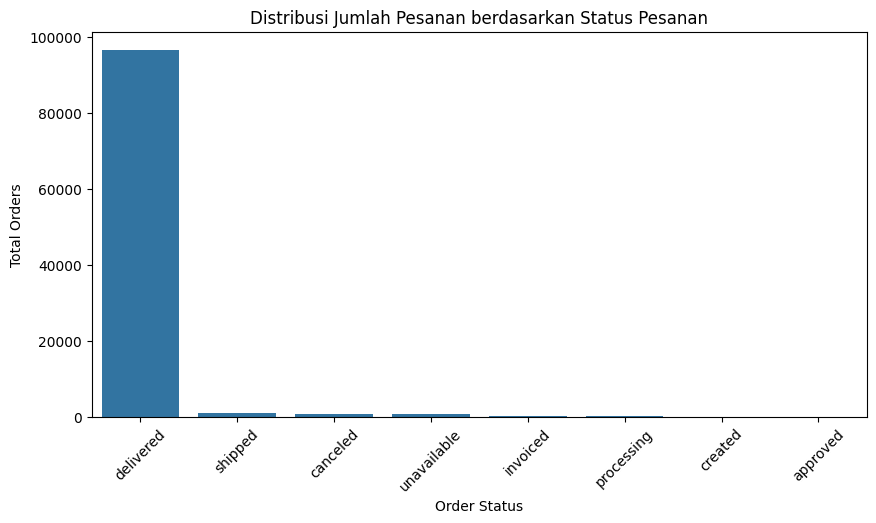

In [48]:
orderCounts = orders.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)
orderCounts = orderCounts.reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='order_status', y='order_id', data=orderCounts)

plt.title('Distribusi Jumlah Pesanan berdasarkan Status Pesanan')
plt.xlabel('Order Status')
plt.ylabel('Total Orders')

plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2

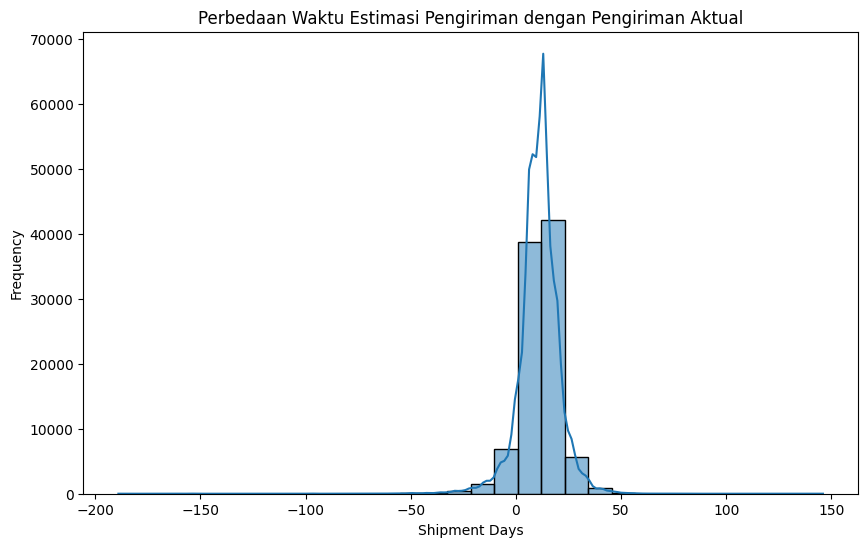

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(orders.shipment, bins=30, kde=True)

plt.title('Perbedaan Waktu Estimasi Pengiriman dengan Pengiriman Aktual')
plt.xlabel('Shipment Days')
plt.ylabel('Frequency')
plt.show()

### Pertanyaan 3

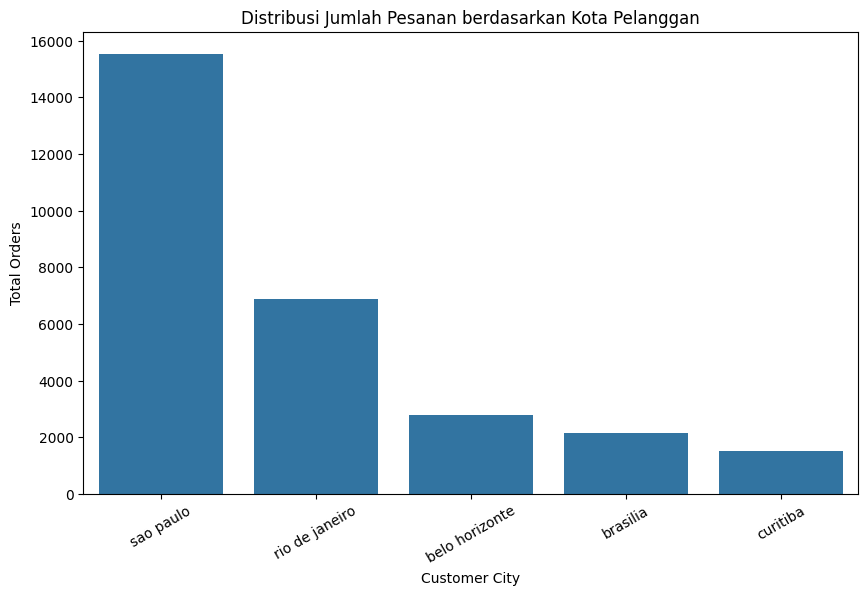

In [50]:
orderCounts = ordersCustomers.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).head(5)
orderCounts = orderCounts.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_city', y='order_id', data=orderCounts)

plt.title('Distribusi Jumlah Pesanan berdasarkan Kota Pelanggan')
plt.xlabel('Customer City')
plt.ylabel('Total Orders')

plt.xticks(rotation=30)
plt.show()

### Pertanyaan 4

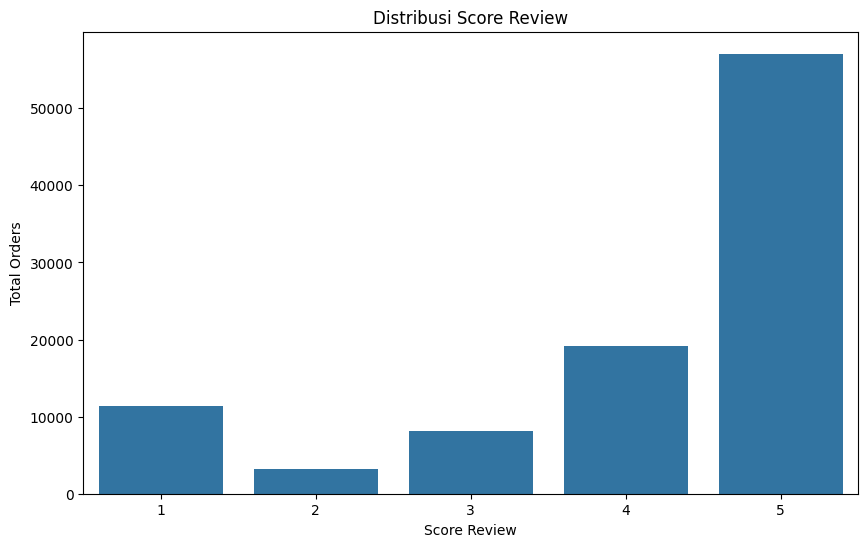

In [51]:
orderReviews = reviews.groupby(by='review_score').order_id.nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='order_id', data=orderReviews)

plt.title('Distribusi Score Review')
plt.xlabel('Score Review')
plt.ylabel('Total Orders')

plt.show()

### Pertanyaan 5

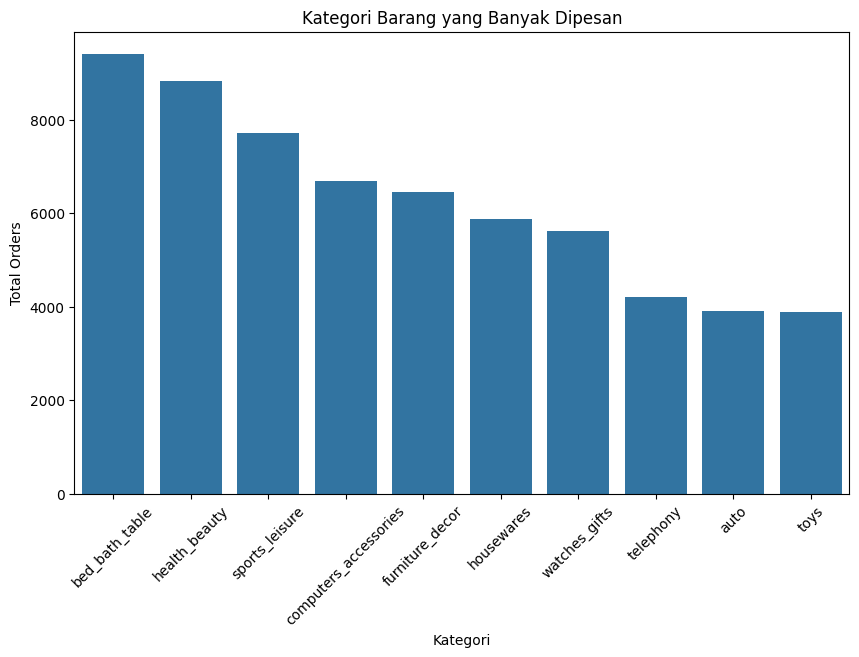

In [52]:
orderCounts = ordersProducts.groupby(by='product_category_name').order_id.nunique().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name', y='order_id', data=orderCounts)

plt.title('Kategori Barang yang Banyak Dipesan')
plt.xlabel('Kategori')
plt.ylabel('Total Orders')

plt.xticks(rotation=45)
plt.show()

### Pertanyaan 6

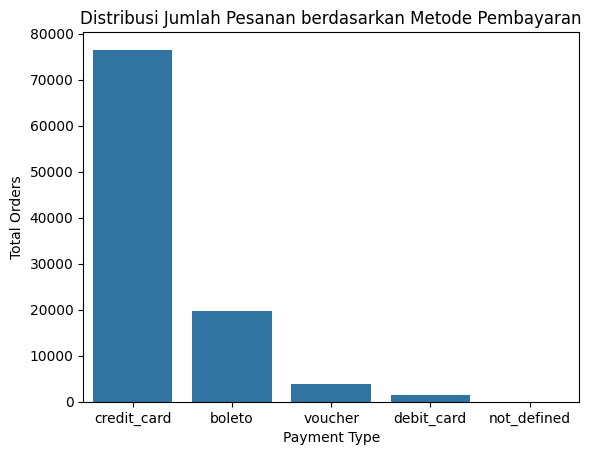

In [53]:
orderPayments = payments.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': 'mean',
}).sort_values(by='order_id', ascending=False)

sns.barplot(x=orderPayments.index, y=orderPayments.order_id)
plt.title('Distribusi Jumlah Pesanan berdasarkan Metode Pembayaran')
plt.xlabel('Payment Type')
plt.ylabel('Total Orders')

plt.show()

## Conclusion

- Pertanyaan 1 : Sebagian besar pesanan berhasil dikirim, tapi perlu diperhatikan untuk pesanan yang dibatalkan maupun terkait stok barang
- Pertanyaan 2 : Proses pengiriman berjalan dengan baik karena rata - rata pengiriman aktual lebih cepat 12 hari daripada estimasi namun masih perlu dibenahi lagi karena pengiriman yang terlambat juga tidak sedikit
- Pertanyaan 3 : Top 5 kota dengan pelanggan terbanyak yaitu Sao Paulo, Rio de Janeiro, Belo Horizonte, Brazilia, Curitiba
- Pertanyaan 4 : Score review tertinggi berada di nilai 5 tapi yang perlu diperhatikan score review nilai 1 berada di peringkat ketiga paling banyak sehingga diperlukan pembenahan dan perbaikan layanan
- Pertanyaan 5 : Top 5 kategori paling laris adalah terkait perabotan rumah (peralatan tidur, peralatan mandi, meja), kecantikan dan kesehatan, olahraga, perlengkapan komputer, dekorasi rumah
- Pertanyaan 6 : Metode pembayaran yang paling digunakan adalah melalui kartu kredit, kemudian diikuti oleh boleto, voucher, dan kartu debit serta untuk kartu kredit rata - rata cicilan yang diambil sebanyak 3 kali